# Discrete Fourier Transform

According to the Wikipedia:

> In mathematics, the **discrete Fourier transform (DFT)** converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency.

Simply speaking, Fourier transform is used to convert a signal from the time domain to a frequency domain.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

In [95]:
srate = 256 # Hz
time = 2 # seconds
N = srate*time # amount of observations
time_pnts = np.arange(0, time, 1/srate) # observation time points

In [45]:
# parameters for 3 sin signal
freqs = [2, 11, 5] # frequencies
amps = [10, 3, 5] # amplitudes

In [97]:
signal_a = amps[0]*np.sin(2*np.pi*freqs[0]*time_pnts)
signal_b = amps[1]*np.sin(2*np.pi*freqs[1]*time_pnts)
signal_c = amps[2]*np.sin(2*np.pi*freqs[2]*time_pnts)

signal = signal_a + signal_b + signal_c # resulting signal

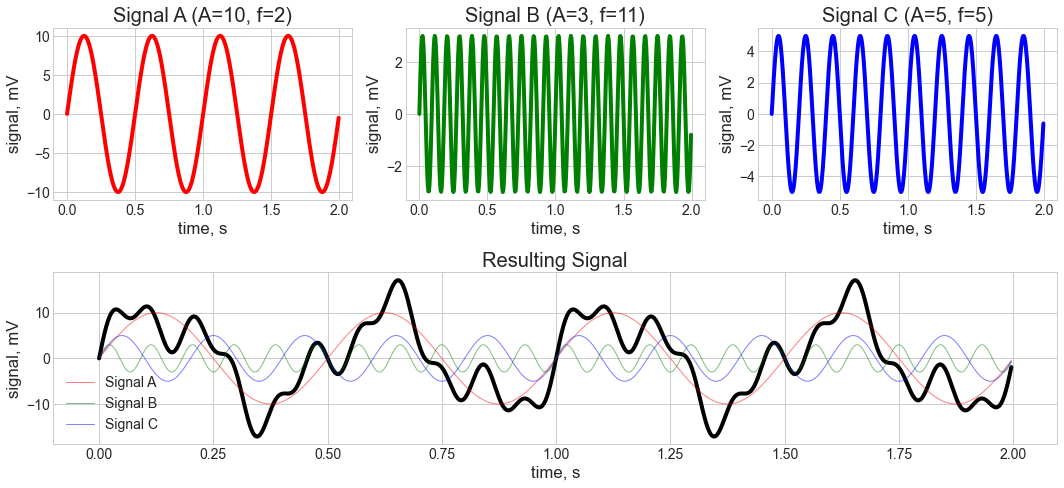

In [102]:
plt.figure(figsize=(15,7))

plt.subplot(231)
plt.plot(time_pnts, signal_a, color='red')
plt.xlabel('time, s')
plt.ylabel('signal, mV')
plt.title(f'Signal A (A={amps[0]}, f={freqs[0]})')

plt.subplot(232)
plt.plot(time_pnts, signal_b, color='green')
plt.xlabel('time, s')
plt.ylabel('signal, mV')
plt.title(f'Signal B (A={amps[1]}, f={freqs[1]})')

plt.subplot(233)
plt.plot(time_pnts, signal_c, color='blue')
plt.xlabel('time, s')
plt.ylabel('signal, mV')
plt.title(f'Signal C (A={amps[2]}, f={freqs[2]})')

plt.subplot(212)
plt.plot(time_pnts, signal, color='black')
plt.plot(time_pnts, signal_a, color='red', linewidth=1, alpha=.5, label='Signal A')
plt.plot(time_pnts, signal_b, color='green', linewidth=1, alpha=.5, label='Signal B')
plt.plot(time_pnts, signal_c, color='blue', linewidth=1, alpha=.5, label='Signal C')
plt.xlabel('time, s')
plt.ylabel('signal, mV')
plt.title('Resulting Signal')
plt.legend()

plt.tight_layout()
plt.show()

In [87]:
fourier_time = np.arange(N)/N
nyquist_freq = int(srate/2)

In [88]:
fourier_coef = np.zeros(signal.shape) + 0j

In [89]:
for f in range(N):
    fourier_sine = np.exp(complex(0,1)*2*np.pi*f*fourier_time)
    
    fourier_coef[f] = np.vdot(signal, fourier_sine)

In [90]:
fourier_coef /= N

In [91]:
hz = np.linspace(0, srate, int(N))

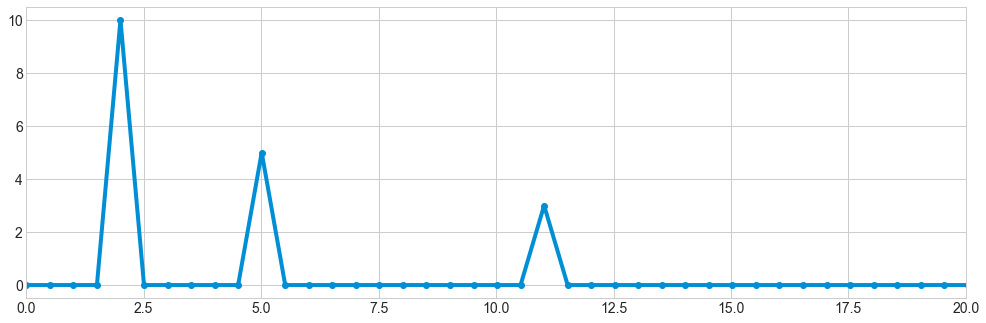

In [92]:
# freqs = [2, 10, 15, 3]
# amps = [10, 3, 1, 4]

plt.figure(figsize=(15,5))
plt.plot(hz, 2*np.abs(fourier_coef), 'o-')
plt.xlim([0, 20])
plt.show()

In [93]:
fc = np.fft.fft(signal)/N

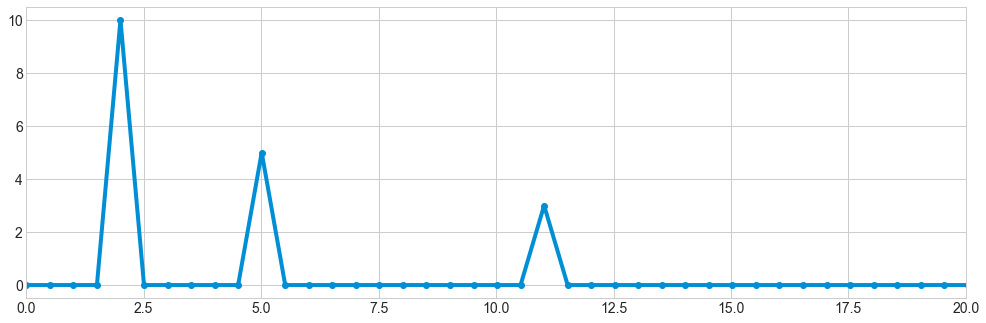

In [94]:
plt.figure(figsize=(15,5))
plt.plot(hz, 2*np.abs(fc), 'o-')
plt.xlim([0, 20])
plt.show()